# Logistic Regression In-Class Exercises

Do these exercises along with the videos.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Question 1.  Linear Classifier

Given the data below, use the `plt.scatter()` function to plot the data points with different colors for the classes.

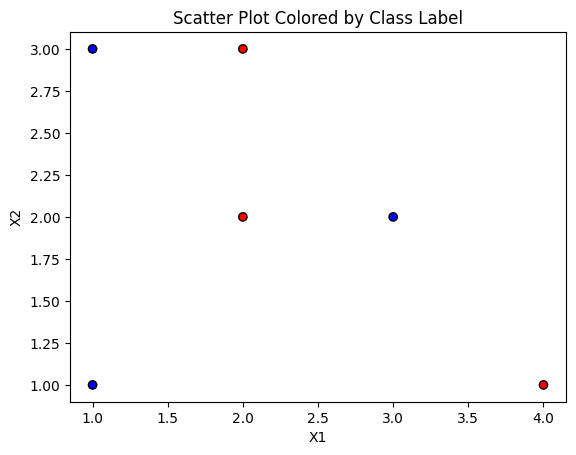

In [5]:
X = np.array([[1,1], [1,3], [2,2], [2,3], [3,2], [4,1]])
y = np.array([0,0,1,1,0,1], dtype=np.int_)

# TODO
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot Colored by Class Label')
plt.show()

You should see that the data is not linearly separable.
Find a linear classifier that makes a minimal number of errors on the training data.

Write a function `predict()` function for the classifer and get the predicted labels with the command:

    yhat = predict(X)

Print `yhat` and `y`.  How many errors does your classifier make?

In [ ]:
class LogisticRegression:
    def __init__(self, X, y):
        self.X = np.array(X)
        self.Y = np.array(y)
        self.num_attributes = self.X.shape[1]
        self.coef_ = np.zeros(self.num_attributes)
        self.intercept_ = 0

    def sig(self,v):
        return 1/(1 + np.exp(-v))

    # binary cross entropy
    def cost_function(self):
        m = self.X.shape[0]     # number of samples


        """ y_pred

        - self.X @ self.coef_ is matrix multiplication between our feature matrix and our weight matrix 
        - self.intercept_ is just us adding bias
        - similar to linear regression but constrained to a value between 0,1

        """

        y_pred = self.sig(self.X @ self.coef_ + self.intercept_)    # predictions
        return - (1/m) * np.sum(self.Y * np.log(y_pred) + (1 - self.Y) * np.log(1 - y_pred))

    # gradient descent
    def fit(self, lr=0.01, epochs=1000):
        m = self.X.shape[0]

        for _ in range(epochs):
            y_pred = self.sig(self.X @ self.coef_ + self.intercept_)
            error = y_pred - self.Y     # error

            # gradients
            dW = (1/m) * (self.X.T @ error)
            dB = (1/m) * (np.sum(error))

            # updating the parameters
            self.coef_ -= lr * dW
            self.intercept_ -= lr * dB
 

    def predict(self, X_new):
        y_pred = self.sig(X_new @ self.coef_ + self.intercept_)
        return (y_pred >= 0.5).astype(int)  # convert probabilities to class labels


    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)  # accuracy calculation

# TODO
lr = LogisticRegression(X,y)
lr.fit(lr=0.1)
yhat = lr.predict(X)
print(yhat)
print(y)

""" my classifier made 2 errors ... """

[0 0 0 1 1 1]
[0 0 1 1 0 1]


# Question 2:   Logistic Model

Consider the model for the passing a test:

    P(pass test) = 1/(1+exp(-z)),  z =  w0 + w1*hrs_alone + w2*hrs_tutor
    
where `hrs_alone` is the number of hours studied alone and `hrs_tutor` is the number of hours with a tutor.
Given the values below find `w0` for the probability = 0.6.


In [8]:
hrs_alone = 4
hrs_tutor = 1
w1 = 0.2
w2 = 0.5
prob = 0.6


z_rest = w1 * hrs_alone + w2 * hrs_tutor  # 0.2*4 + 0.5*1 = 1.3

# Solve for w0
z = -np.log((1 / prob) - 1)               # Invert sigmoid to get z

# TODO
w0 = z - z_rest                           # Rearrange: z = w0 + z_rest -> w0 = z - z_rest
print(f"w0 ≈ {w0:.4f}")

w0 ≈ -0.8945


Given the values above, plot the probability of passing as a function of `hrs_tutor` in the range of 0 to 10 hours.

In [15]:
# TODO
# hrs_tutor = np.arange(10)

for i in range(10):
    z = w0 + w1 * hrs_alone + w2 * i
    prob = 1/(1+np.exp(-z))
    print(f'Proability for {i} hours studied: {prob}')


Proability for 0 hours studied: 0.476383862223051
Proability for 1 hours studied: 0.6
Proability for 2 hours studied: 0.7120712879653152
Proability for 3 hours studied: 0.8030496866860279
Proability for 4 hours studied: 0.8705088185971921
Proability for 5 hours studied: 0.9172430971043682
Proability for 6 hours studied: 0.9481159364412806
Proability for 7 hours studied: 0.9678748975365392
Proability for 8 hours studied: 0.9802656939885876
Proability for 9 hours studied: 0.9879368700291201


## Question 3.  Calculating and Plotting the Binary Cross Entropy Loss

You are given the scalar data `x` and `y` with binary class labels below.

In [17]:
x = np.array([-1,1,3,4,5])
y = np.array([0,0,1,0,1])

Consider a linear classifier of the form:

    z = w[0] + w[1]*x
    yhat = 1 if z > 0 and 0 if z < 0
    
Find `w` that makes at most one error on the training data. Call this selection `w_manual` since you have manually chosen it.

In [24]:
# TODO
w_manual = [-0.8,0.2]

print(f'Original: {y}')

test = []

for i in x:
    z = w_manual[0] + w_manual[1] * i
    prob = 1/(1+np.exp(-z))
    pred = 1 if prob > 0.5 else 0
    test.append(pred)

print(f'Test: {test}')

Original: [0 0 1 0 1]
Test: [0, 0, 0, 0, 1]


Now consider a logistic model,

    z = w[0] + w[1]*x
    p(y=1|x) = 1 / (1 + exp(-z))
    
Complete the function below that computes the binary cross entropy for a given vector `w` and training data `x,y`. Use the function to compute the BCE loss for the `w_manual`. 

In [26]:
def bce_loss(x,y,w):
    # TODO
    z = w[0] + w[1] * x
    prob = 1/(1+np.exp(-z))
    J = -np.mean(y * np.log(prob) + (1 - y) * np.log(1 - prob))  # Full BCE

    # J = BCE loss
    return J

bce = bce_loss(x,y,w_manual)

# Print the loss for `w_manual`
print(bce)

0.5680349114654476


Now consider a set of `w = [w0, 0.5]`.  
* Plot the BCE loss over 100 values `w0` from -2.5 to 0  
* What value of `w0`gives the minimum BCE loss?   Call this `w0_opt`.
* What is the minimum BCE loss?

In [29]:
nt = 100
w0_test = np.linspace(-2.5,0,nt)
w1 = 0.5

# TODO
loss = [bce_loss(x, y, [w0, w1]) for w0 in w0_test]
w0_opt = min(loss)
print(w0_opt)

0.4781784632629634


Suppose you select `w1=0.5`and `w0=w0_opt` from the previous section.  What values `x` is `P(y=1|x) > 0.5`?

In [30]:
# TODO.  Describe the set

# We have P(y=1|x) > 0.5 <=> z > 0  <=> w0 + w1*x > 0 <=> x > t = -w0/w1

threshold_x = -2 * w0_opt

# Print the result
print(f'Threshold for x: {threshold_x}')

Threshold for x: -0.9563569265259269


## Question 4.  Heart Attack Fit

In this exercise, we fit heart attack data from the UCI website.  We can load it as follows.

In [31]:
## Generate synthetic data
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
         'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, na_values='?',header=None, names=names)
df = df.dropna()

Print the first few rows of the data frame.
Print the number of attributes of number of samples

In [32]:
# TODO
print(df.head(10))
print(df.shape[1])


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3

The target will be `num` which is the number of arterial blockages.  Get the target vector `y` from the `df[num]` column.  To make this a binary classification problem, let `y[i] == 1` whenever the number is greater than 0.  Otherwise, `y[i] == 0`.  You will have to convert the value to integer.

In [33]:
# TODO
y = df['num']

Get the data matrix `X` from all the attributes other than `num`.  

In [34]:
# TODO
#  X = ...
X = df.drop(columns=['num'])

Split the data into traing and test with `test_size=0.25`.

In [35]:
from sklearn.model_selection import train_test_split

# TODO:
#   Xtr, Xts, ytr, yts = ...
Xtr, Xts, ytr, yts = train_test_split(X,y,train_size=0.8,random_state=42)

Scale the training and test data with the `StandardScaler`. 

In [62]:
from sklearn.preprocessing import StandardScaler

# TODO
#  Xtr1 = ...
#  Xts1 = ...

Fit the data on the training data set, predict on the test and measure the accuracy.

In [17]:
# TODO

Create a stem plot of the coefficients.  

In [18]:
# TODO

## Further exercises

If you want to try a little more, see if you can use L1 regularization to find the features that are best in explaining heart blockages.